<a href="https://colab.research.google.com/github/AJ82981/Netflix_TV_Show_and_Movie_Clustering/blob/main/Netflix_content_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Show Clustering



##### **Project Type**    - Unsupervised Learning
##### **Contribution**    - Individual

# **Project Summary -**

The Netflix TV Show and Movie Clustering project aims to analyze and categorize the content available on the Netflix platform. With an extensive library of TV shows and movies, understanding the underlying patterns and preferences of viewers can enhance user experience, content recommendation systems, and business strategies. The project involves applying machine learning techniques to group similar content together based on various features, leading to insights that can guide content creation, marketing, and user engagement strategies

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary problem addressed in this project is to cluster Netflix TV shows and movies based on their attributes and characteristics. The project seeks to answer questions such as:

- How can we group TV shows and movies on Netflix into meaningful categories?
- What are the key features that contribute to the differentiation between content clusters?
- Can we identify any hidden patterns or trends within the content library?
- How can clustering contribute to content recommendation and personalized user experiences?
- How might these clusters be useful for marketing and targeted advertising campaigns?

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Unsupervised - ML Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

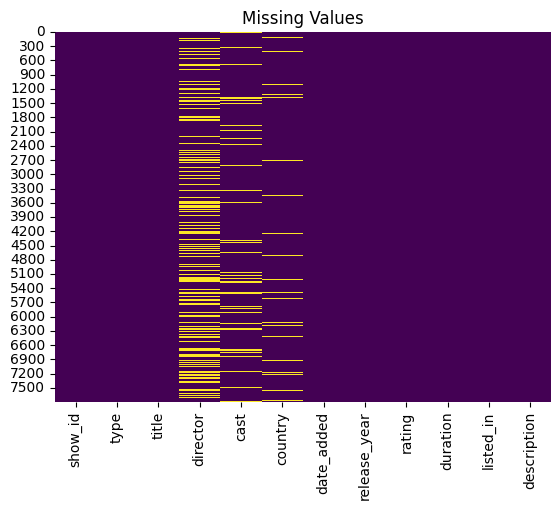

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?

- The dataset provided has 12 columns and 7787 rows
- No Duplicate values are found in the data
- It also consists of missing values in
      director        2389
      cast             718
      country          507
      date_added        10
      rating             7
- All columns are object type except 'release_year' which is *int64*

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns
# pd.DataFrame(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [ ]:
for i in df.columns:
  print(f'{i}', '- ',df[i].nunique(), 'Missing Values-',df[i].isna().sum())

column_unique_values = ['type','rating']
for i in column_unique_values:
  unique_values = df[i].unique()
  print(unique_values)

show_id -  7787 Missing Values- 0
type -  2 Missing Values- 0
title -  7787 Missing Values- 0
director -  4049 Missing Values- 2389
cast -  6831 Missing Values- 718
country -  681 Missing Values- 507
date_added -  1565 Missing Values- 10
release_year -  73 Missing Values- 0
rating -  14 Missing Values- 7
duration -  216 Missing Values- 0
listed_in -  492 Missing Values- 0
description -  7769 Missing Values- 0
['TV Show' 'Movie']
['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']


In [ ]:
# Release_year values for the missing date_added
df[df['date_added'].isna()]['release_year']

258     2013
549     2018
2263    2003
2288    2003
2555    2008
3374    2010
3492    2012
3946    2016
5137    2015
6065    2015
Name: release_year, dtype: int64

### Variables Description

'show_id' - Columns consists of unique show ids for Movies and TV Series both. *No missing value*

 'type' - Categorical column with 2 entries 'Movie'/'TV Show'.*No missing value*

 'title' - The title of the TV SHow or Movie. *No missing value*

 'director' - Categorical Nominal Data, consisting of director's name. This column consists of *2389 missing values*

 'cast' - Nominal Data with *718 missing values*

 'country' - Categorical Nominal Data. With *507 missing values*

 'date_added' - The tracked release dates of the series or movies span from 1925, the earliest, to 2021, the most recent. Object Datatype. The column has *10 missing values*

 'release_year'- This column consists of teh release year of the respective TV show or movie. **int64** Datatype. *No values missing*

 'rating' - Categorical column with 13 different rating types. *7 Missing values*.

 'duration' - The column consists of the duration in the mentioned format. For Movie - 'x min' and for TV Series - 'x Seasons'. *No missing value*

 'listed_in' - The column conists of the Genre of the Movie or TV Show.

 'description' - Consists a brief description of the movie or series. *No missing value*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(f'{i} :',df[i].nunique())

show_id : 7787
type : 2
title : 7787
director : 4049
cast : 6831
country : 681
date_added : 1565
release_year : 73
rating : 14
duration : 216
listed_in : 492
description : 7769


In [ ]:
# Missing Values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['release_year'] = pd.to_datetime(df['release_year'],format = '%Y')
df['release_year'] = df['release_year'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


date_added should also be converted to proper datetime datatype. But it consists of spaces in the front and back. To remove this we use str.strip() on the 'date_added' column.

In [ ]:
df['date_added']=df['date_added'].str.strip()

In [ ]:
df['date_added_formatted'] = pd.to_datetime(df['date_added'],format = '%B %d, %Y')
df['date_added_formatted'] = df['date_added_formatted'].dt.date

In [ ]:
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description date_added_formatted  
0  In a future where the elite inhabit an island ...           2020-08-14  
1  After a devastating earthquake hits Mexico Cit...           2016-12-23  
2  When an army recruit is found dead, his fellow...           2018-12-20  
3  In a postapocalyptic world, rag-doll robots hi...           2017-11-16  
4  A brilliant group of students become card-coun...           2020-01-01

### Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
df.isna().sum()

show_id                    0
type                       0
title                      0
director                2389
cast                     718
country                  507
date_added                10
release_year               0
rating                     7
duration                   0
listed_in                  0
description                0
date_added_formatted      10
dtype: int64

In [ ]:
df['cast'].fillna('No cast',inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['director'].fillna('', inplace=True)

In [ ]:
df.isna().sum()

show_id                  0
type                     0
title                    0
director                 0
cast                     0
country                  0
date_added              10
release_year             0
rating                   7
duration                 0
listed_in                0
description              0
date_added_formatted    10
dtype: int64

In [ ]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.isna().sum()

show_id                 0
type                    0
title                   0
director                0
cast                    0
country                 0
date_added              0
release_year            0
rating                  0
duration                0
listed_in               0
description             0
date_added_formatted    0
dtype: int64

### What all manipulations have you done and insights you found?

The data provided consisted missing values in the following columns:
- Director - 2389 missing values. Replaced with Blanks.
- Cast - 718 missing values. Replaced with Blanks.
- Country - 507 missing values. These values can be imputed based on mode of the column. Replaced with the mode.
- date_added - 10 missng values. Missing rows removed since it's a very small count
- rating - 7 missing values. Missing values removed.

The release_year and date_added columns are formatted properly in this step.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - TV Shows vs Movies

In [ ]:
# Chart - 1 visualization code

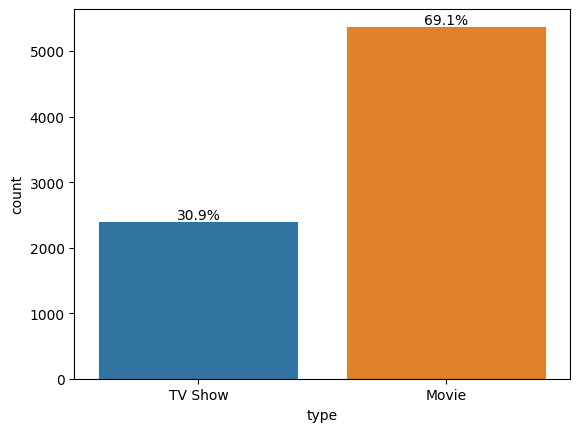

In [ ]:
ax = sns.countplot(df,x='type')
total = len(df)
for p in ax.patches:
    ax.annotate(f'{100*p.get_height()/total:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

##### 1. Why did you pick the specific chart?

To get the content distribution of Movie or Series in the Data.

##### 2. What is/are the insight(s) found from the chart?

Of the Data Provided the Movie vs TV Show Distribution is 69% & 31% respectively. The number of movies are higher on the platform, considering the whole history.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This view is further taken down below. The trend of the movies or TV Show can suggest the user interest, based on which Netflix can target specific content for more user interaction.

#### Chart - 2 - Content Rated Pie Chart

In [ ]:
# Chart - 2 visualization code

In [ ]:
df_rating = pd.DataFrame(df['rating'].value_counts())
total = df_rating['rating'].sum()
df_rating['%'] = df_rating['rating'].apply(lambda x: '{:,.2f}'.format(100*x/total))
# df['Formatted_Value'] = df['Value'].apply(lambda x: '{:,.2f}'.format(x))
print(df_rating,type(df_rating))

          rating      %
TV-MA       2861  36.82
TV-14       1928  24.81
TV-PG        804  10.35
R            665   8.56
PG-13        386   4.97
TV-Y         279   3.59
TV-Y7        270   3.47
PG           247   3.18
TV-G         194   2.50
NR            83   1.07
G             39   0.50
TV-Y7-FV       6   0.08
UR             5   0.06
NC-17          3   0.04 <class 'pandas.core.frame.DataFrame'>


In [ ]:
df_rating.index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y', 'TV-Y7', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object')

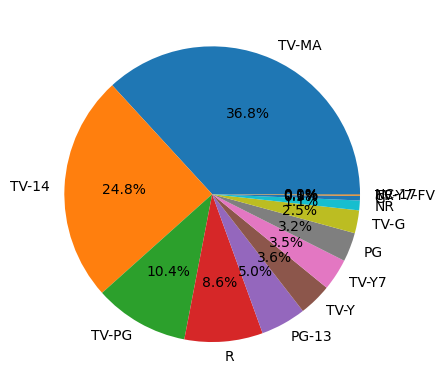

In [ ]:
plt.pie(df_rating['%'],labels = df_rating.index, autopct='%1.1f%%');

##### 1. Why did you pick the specific chart?

We see the distribution of content available according to different rating in this veiw.

##### 2. What is/are the insight(s) found from the chart?

The majority of the content is rated by TV-MA and TV-14 categories.

Major users of the content on Netflix is consumed by Teenagers or Mature Audience

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This provide the content suitability to different age groups. If certain categories are particularly popular, Netflix might invest more in that type of content. This can help the marketing and advertising team to provide user specific contents.

#### Chart - 3 - Timeseries Countplot

In [ ]:
# Chart - 3 visualization code

In [ ]:
df_release_year_count = pd.DataFrame(df.groupby(['release_year','type'])['show_id'].count().sort_values(ascending=False))
# sns.displot(df_release_year_count,x='release_year',hue='type')
# # plt.xticks(ticks= np.arange(df_release_year_count.release_year.min(),df_release_year_count.release_year.max()+1,1), rotation = 90);
# # df.groupby(['type','rating'])['show_id'].count().sort_values(ascending=False)

In [ ]:
df_tv_show = df[df['type']=='TV Show'].copy()
df_movies = df[df['type']=='Movie'].copy()

In [ ]:
# sns.countplot(x='release_year',data=df_tv_show);

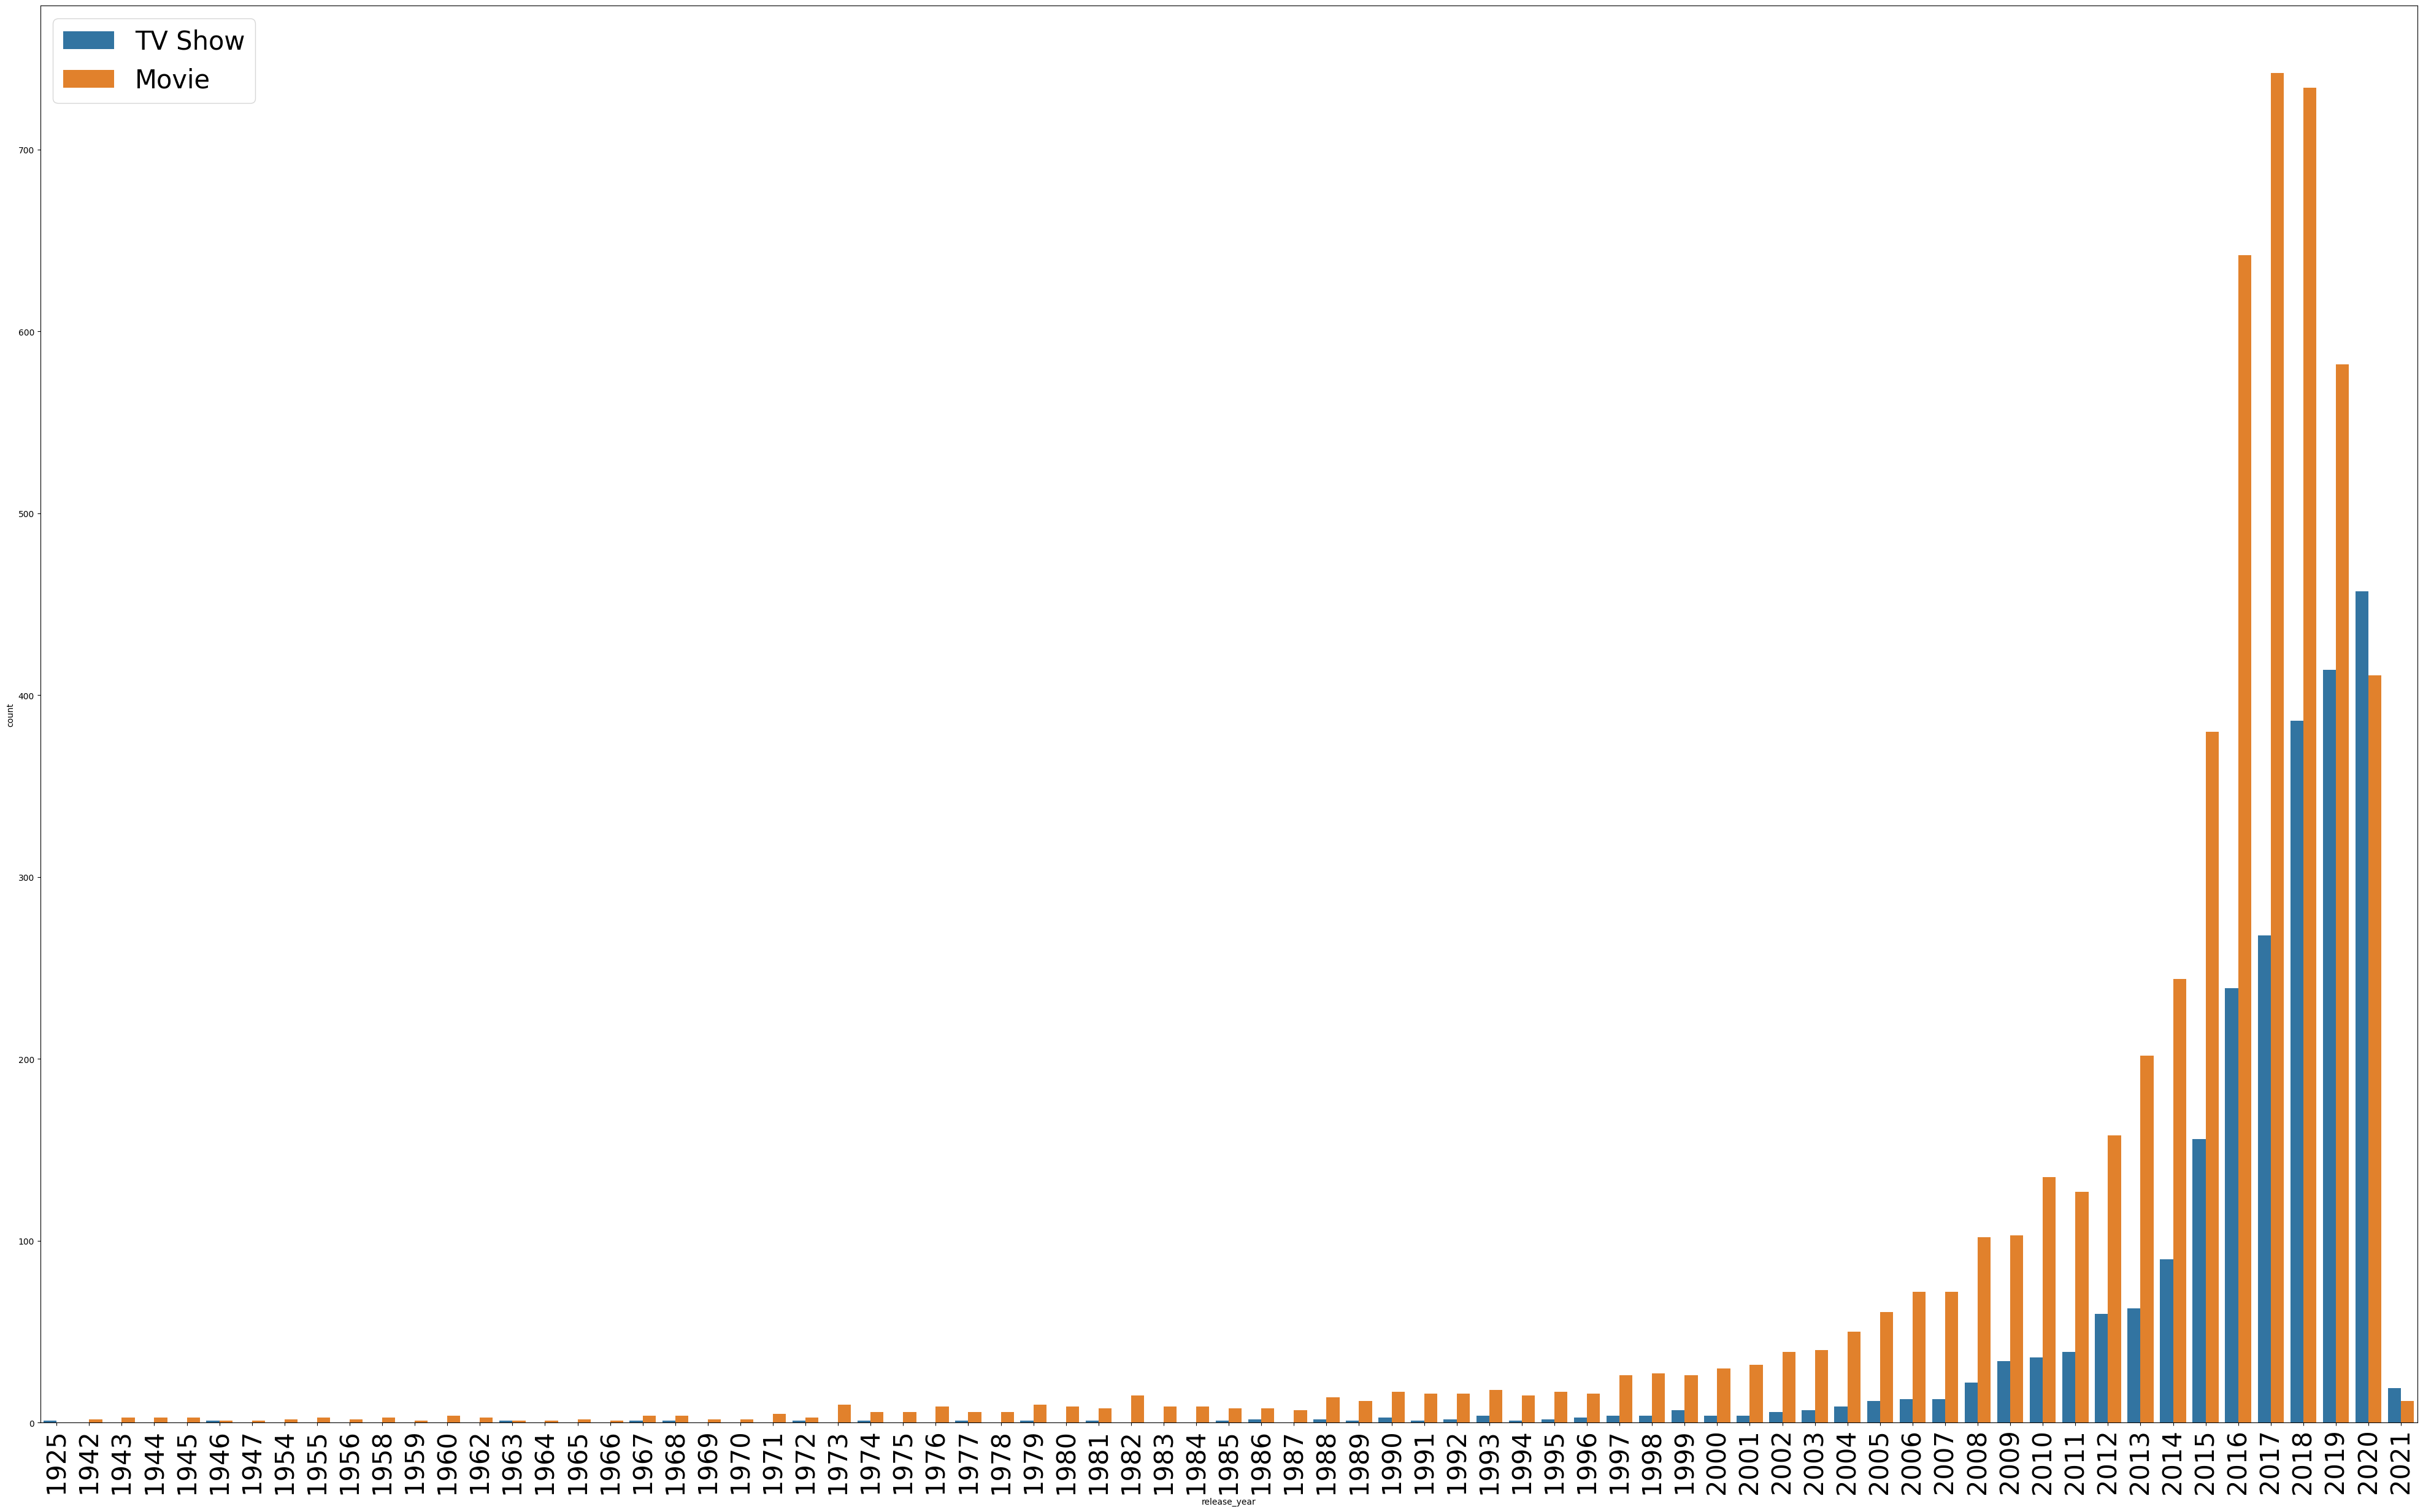

In [ ]:
plt.figure(figsize=(50,30));
sns.countplot(x='release_year',data=df,hue='type');
plt.xticks(rotation=90,fontsize=30);
plt.legend(fontsize=30);

##### 1. Why did you pick the specific chart?

This gives us the year on year comparison of the types of content released on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The earliest content available on the platform is of 1925. The trend shows a rapid inclination of content from 2000.
There was a rapid rise in movies, but the trend declines fro 2019. This could be due to covid flu at the time.
Alternatively the is a rise in the making of TV Shows in this period. This suggests the focus of content type relased on the platform has shifted to TV Shows during the Covid Period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4 - Month-on-month Trend of Content

In [ ]:
# Chart - 4 visualization code

In [ ]:
df_month_year = df.groupby([pd.to_datetime(df['date_added_formatted']).dt.month,'type'])['show_id'].count()
df_month_year = pd.DataFrame(df_month_year.unstack(level='type'))

# Convert index to a column
df_month_year.reset_index(inplace=True)
df_month_year.rename(columns={'index': 'date_added_formatted'}, inplace=True)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df_month_year, id_vars=['date_added_formatted'], value_vars=['Movie', 'TV Show'], var_name='type', value_name='count')
df_melted_whole = df_melted.groupby('date_added_formatted')['count'].sum()
df_melted_whole = pd.DataFrame(df_melted_whole)

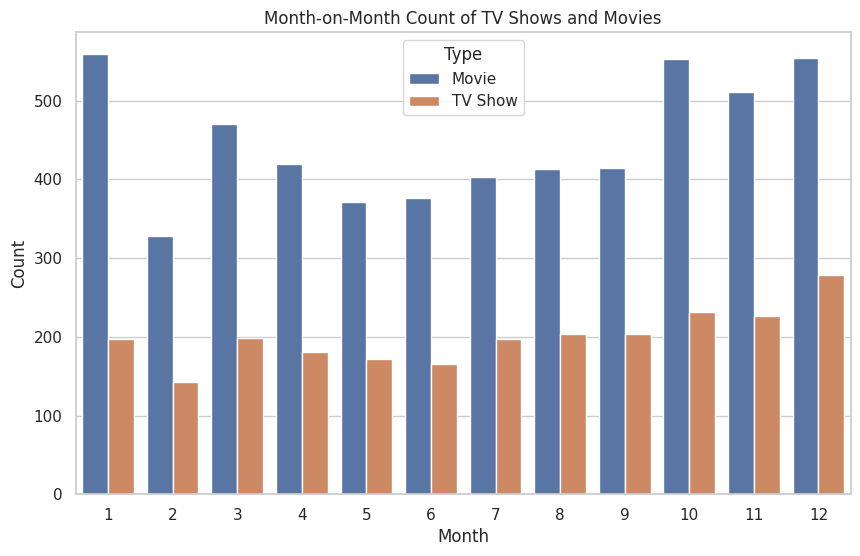

In [ ]:
# Create month-on-month visualization using Seaborn lineplot
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df_melted, x='date_added_formatted', y='count', hue='type', marker='o')
sns.barplot(data=df_melted, x='date_added_formatted', y='count', hue='type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-on-Month Count of TV Shows and Movies')
plt.legend(title='Type')
plt.show()

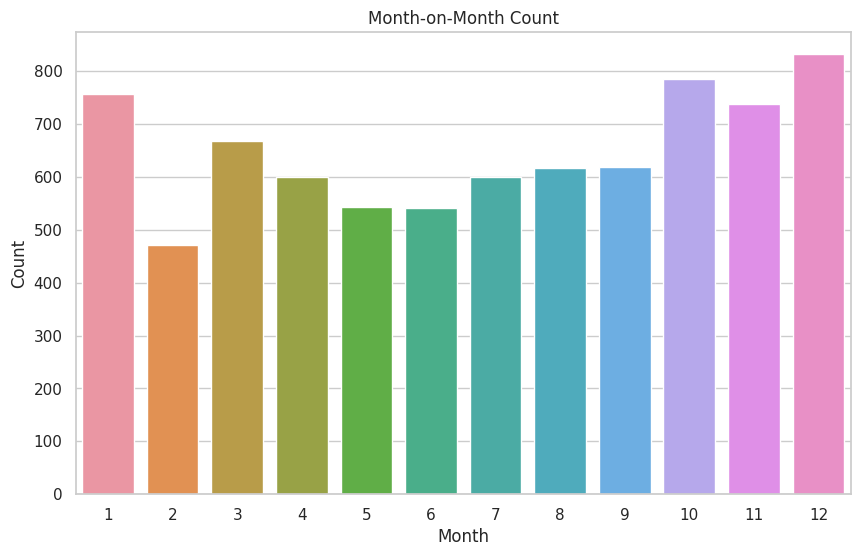

In [ ]:
# Create month-on-month visualization using Seaborn lineplot
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df_melted, x='date_added_formatted', y='count', hue='type', marker='o')
sns.barplot(data=pd.DataFrame(df_melted_whole),x=df_melted_whole.index,y='count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-on-Month Count')
plt.show()

##### 1. Why did you pick the specific chart?

To see the content released variation across the months. This might help to get an idea of the

##### 2. What is/are the insight(s) found from the chart?

The trend shows a spike in the Year starting and Year Ending suggesting the major contents were released around year end or year start

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - WordCloud of Contents available in the Dataset

In [ ]:
# Chart - 5 visualization code

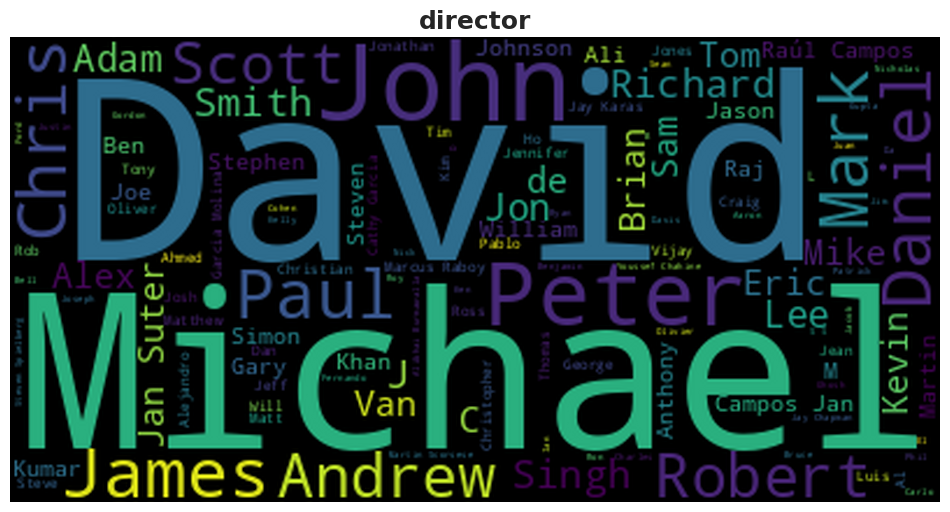

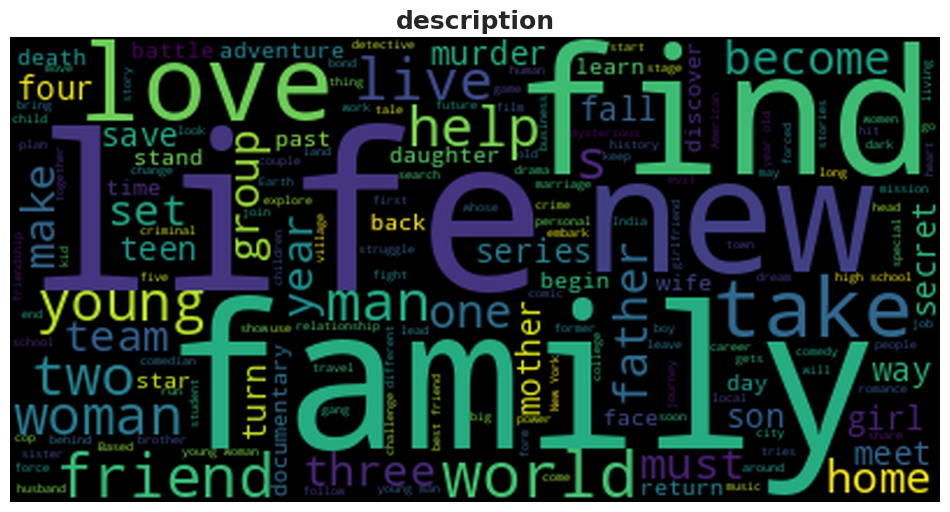

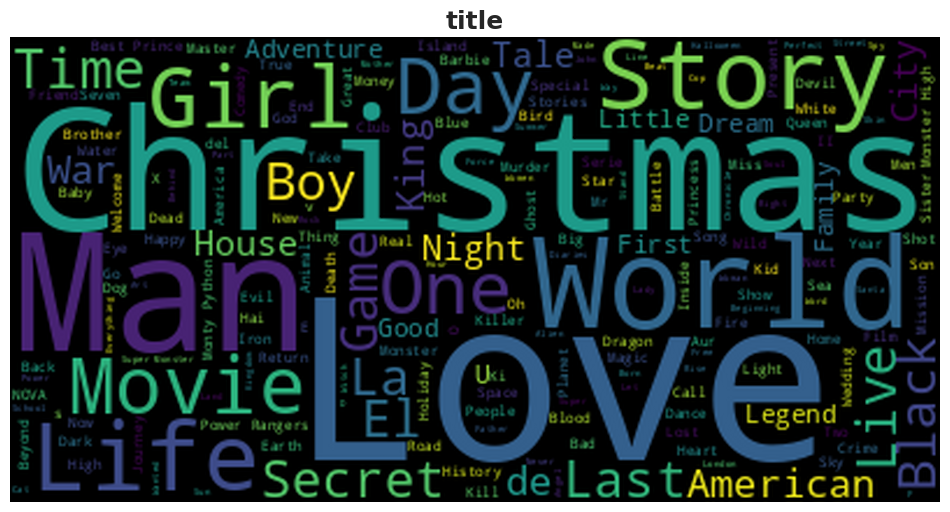

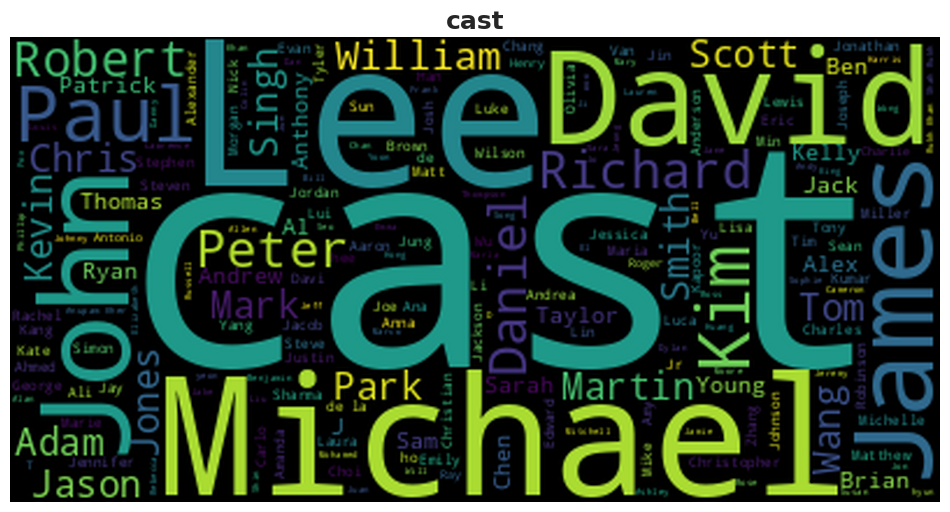

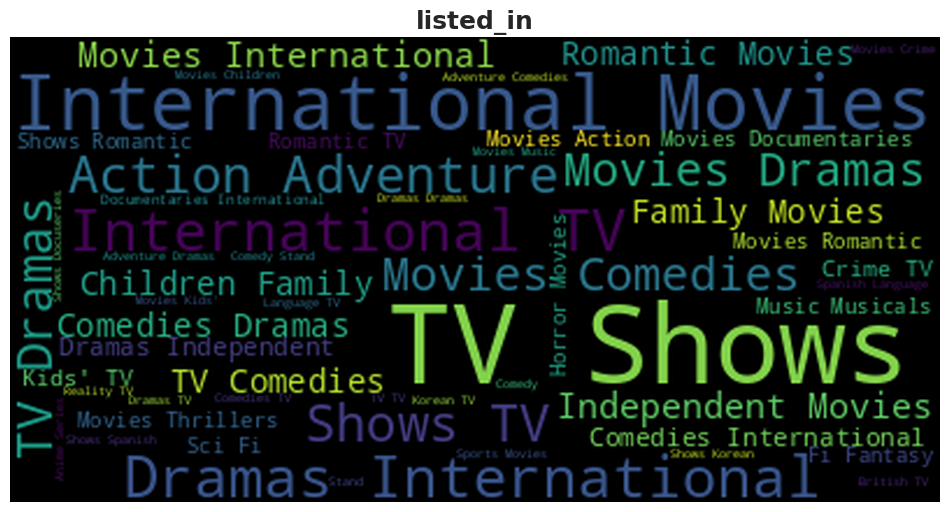

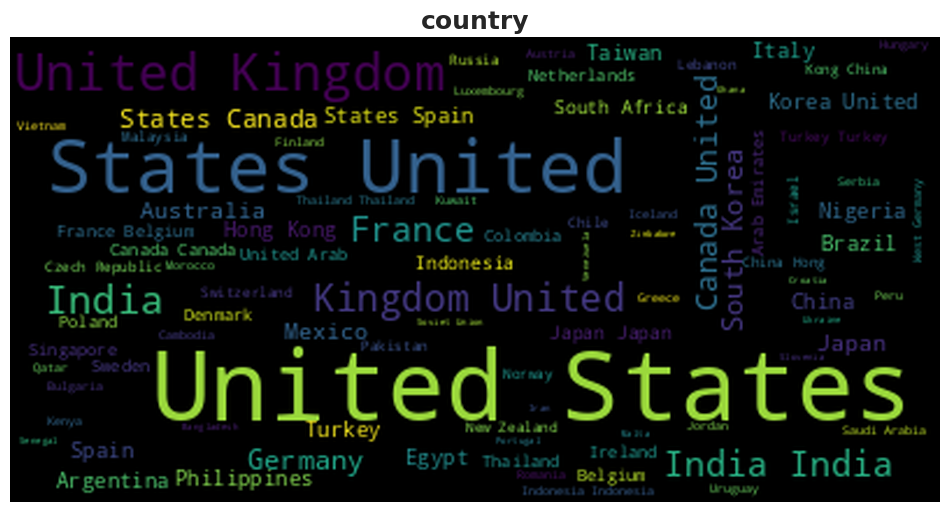

In [ ]:
features_for_wordplot = ['director', 'description', 'title', 'cast', 'listed_in', 'country']
for i in features_for_wordplot:

  df_word_cloud = df[i]
  text = " ".join(str(word) for word in df_word_cloud)
  # Create stopword list:
  stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation='blackman')
  plt.axis("off")
  plt.title(i, fontsize=18, fontweight='bold')
  plt.show()

##### 1. Why did you pick the specific chart?

The chart shows the word cloud of different content available in the Netflix dataset. A word cloud is a visual representation of text data where the size of each word is proportional to its frequency in the text

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Duration Countplot for TV Shows and Movies

In [ ]:
# Chart - 6 visualization code

In [ ]:

df_movies[['time','unit']] = df_movies['duration'].str.split(' ',expand=True)
df_tv_show[['time','unit']] = df_tv_show['duration'].str.split(' ',expand=True)

In [ ]:
# Convert the 'time' column to numeric
df_movies['time'] = pd.to_numeric(df_movies['time'])
df_tv_show['time'] = pd.to_numeric(df_tv_show['time'])

In [ ]:
print(df_movies['time'].max(),df_tv_show['time'].max(),df_movies['time'].min(),df_tv_show['time'].min())


312 16 3 1


In [ ]:
print(df_movies['time'].mean(),df_tv_show['time'].mean())

99.33041697691735 1.761467889908257


In [ ]:
# Define the bin edges and labels for categorization
bin_edges_1 = [0, 2, 4, 6, float('inf')]  # Bin edges in minutes
bin_labels_1 = ['Few (1-2)', 'Moderate (3-4)', 'Many (5-6)', 'Very Many (7+)']

# Categorize the 'time' column based on the bin edges and labels
df_tv_show['duration_category'] = pd.cut(df_tv_show['time'], bins=bin_edges_1, labels=bin_labels_1)

In [ ]:
# Define the bin edges and labels for categorization
bin_edges_2 = [0, 30, 60, 120, float('inf')]  # Bin edges in minutes
bin_labels_2 = ['Short (<=30)', 'Medium (31-60)', 'Long (61-120)', 'Very Long (121+)']

# Categorize the 'time' column based on the bin edges and labels
df_movies['duration_category'] = pd.cut(df_movies['time'], bins=bin_edges_2, labels=bin_labels_2)

<Axes: xlabel='duration_category', ylabel='count'>

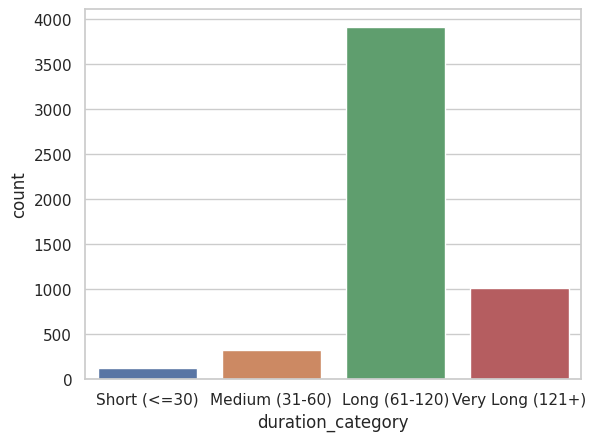

In [ ]:
sns.countplot(df_movies,x='duration_category')

<Axes: xlabel='duration_category', ylabel='count'>

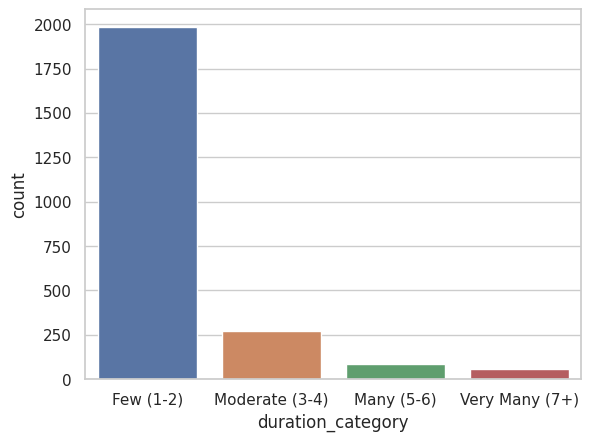

In [ ]:
sns.countplot(df_tv_show,x='duration_category')

##### 1. Why did you pick the specific chart?

The chart provides the distribution of duration categories in which the TV and Movies are available. The movies are categorized by minutes being small, medium and long and the TV Shows are categorized as having seasons as Few, Moderate, Many and Very many.

##### 2. What is/are the insight(s) found from the chart?

From the content available maximum TV shows falls in the Few(1-2) season category and maximum Movies falls under long(61-120) Mins category

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Countrywise ditribution of content made

In [ ]:
# Chart - 7 visualization code

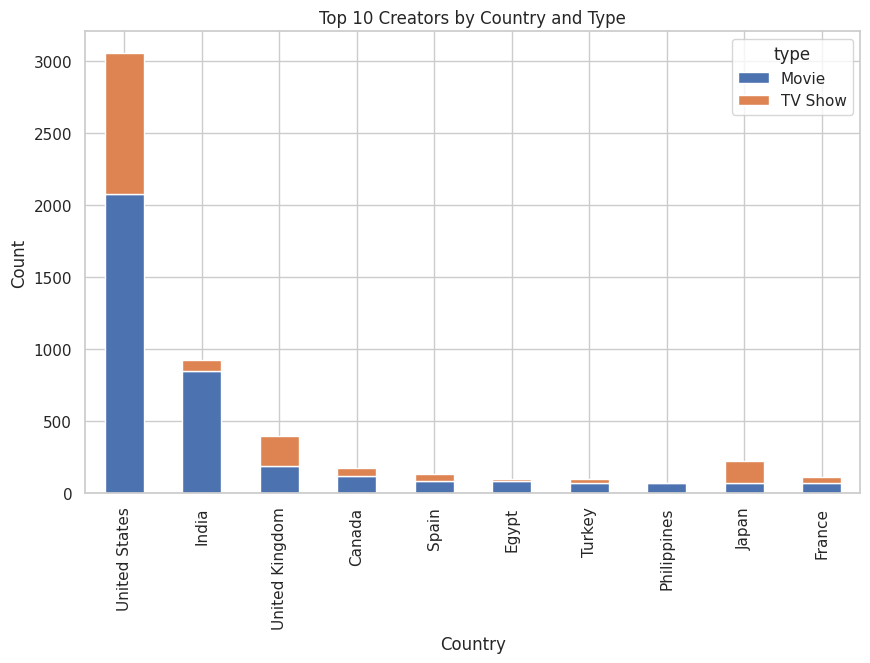

In [ ]:
# Group by 'country' and 'type', count occurrences, and unstack
df_grouped = df.groupby(['country', 'type'])['show_id'].count().unstack(fill_value=0)

# Reset index to columns
df_grouped = df_grouped.reset_index()

# Sort by 'Movie' and 'TV Show' columns in descending order
df_grouped_sorted = df_grouped.sort_values(by=['Movie', 'TV Show'], ascending=[False, False])

# Plot top 10 creators
top_10 = df_grouped_sorted.head(10)
top_10.plot(x='country', kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Creators by Country and Type')
plt.show()

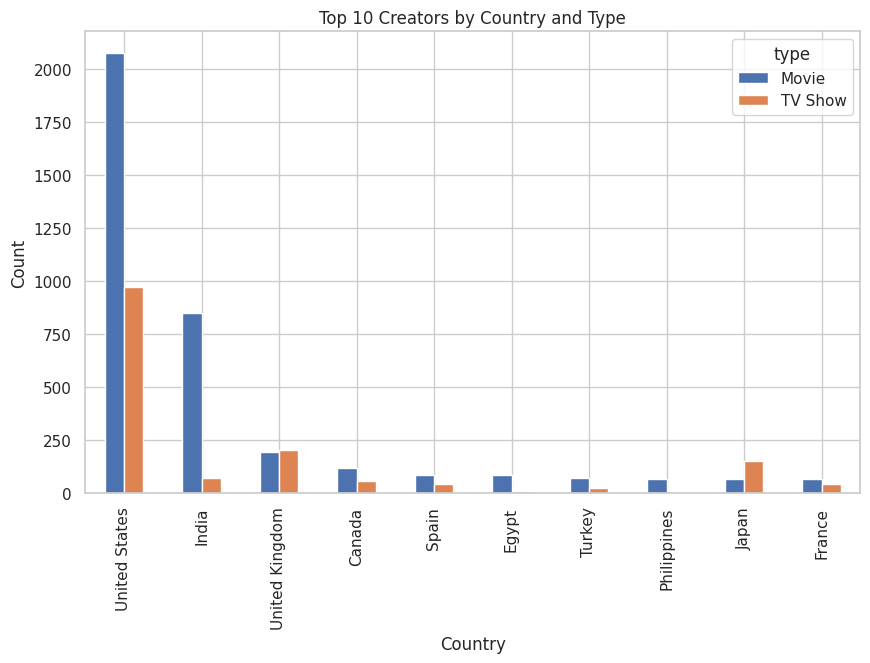

In [ ]:
top_10.plot(x='country', kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Creators by Country and Type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [ ]:
df.head(10)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   
7      s8    Movie    187     Kevin Reynolds   
8      s9    Movie    706      Shravan Kumar   
9     s10    Movie   1920       Vikram Bhatt   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   
7  Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8  Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
9  Rajneesh Duggal, Adah Sharma, Indraneil Sengup...          India   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   
7   November 1, 2019          1997      R    119 min   
8      April 1, 2019          2019  TV-14    118 min   
9  December 15, 2017          2008  TV-MA    143 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   
7                                             Dramas   
8                Horror Movies, International Movies   
9     Horror Movies, International Movies, Thrillers   

                                         description date_added_formatted  
0  In a future where the elite inhabit an island ...           2020-08-14  
1  After a devastating earthquake hits Mexico Cit...           2016-12-23  
2  When an army recruit is found dead, his fellow...           2018-12-20  
3  In a postapocalyptic world, rag-doll robots hi...           2017-11-16  
4  A brilliant group of students become card-coun...           2020-01-01  
5  A genetics professor experiments with a treatm...           2017-07-01  
6  After an awful accident, a couple admitted to ...           2020-06-01  
7  After one of his high school students attacks ...           2019-11-01  
8  When a doctor goes missing, his psychiatrist w...           2019-04-01  
9  An architect and his wife move into a castle t...           2017-12-15

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothesis Test for User Ratings:
- Null Hypothesis (H0): No significant difference in user ratings exists between TV show and movie clusters.
- Alternative Hypothesis (H1): Significant differences in user ratings exist among clusters.
- Test: ANOVA (Analysis of Variance) for comparing means.
- Attribute: User ratings.
- Significance Level: Typically α = 0.05.

2. Genre Distribution Hypothesis Test:
- Null Hypothesis (H0): No significant difference in genre distribution exists between TV show and movie clusters.
- Alternative Hypothesis (H1): Significant differences in genre distribution exist among clusters.
- Test: Chi-Square Test for categorical data.
- Attribute: Genre distribution (categorical data).
- Significance Level: Typically α = 0.05.

3. Release Year Hypothesis Test:
- Null Hypothesis (H0): No significant difference in the average release year exists among TV show and movie clusters.
- Alternative Hypothesis (H1): Significant differences in the average release year exist among clusters.
- Test: ANOVA (Analysis of Variance) for comparing means.
- Attribute: Release year (numerical data).
- Significance Level: Typically α = 0.05.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
cat_encoded = pd.get_dummies(df[['type','rating']],columns=['type','rating'],prefix=['type','rating'])
cat_encoded.columns

Index(['type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17', 'rating_NR',
       'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
pd.DataFrame(df.columns)

0
0                show_id
1                   type
2                  title
3               director
4                   cast
5                country
6             date_added
7           release_year
8                 rating
9               duration
10             listed_in
11           description
12  date_added_formatted

#### 1. Creating a common column having all the textual data

In [ ]:
df['combined']=df['description']+' '+df['listed_in']+' '+df['country']+' '+df['cast']+' '+df['director']

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_formatted', 'combined'],
      dtype='object')

#### 2. Lower Casing

In [ ]:
# Lower Casing

In [ ]:
df['combined']=df['combined'].str.lower()
df['combined']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead, his fellow...
3       in a postapocalyptic world, rag-doll robots hi...
4       a brilliant group of students become card-coun...
                              ...                        
7782    when lebanon's civil war deprives zozo of his ...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary, south african rapper nast...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: combined, Length: 7770, dtype: object

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

In [ ]:
df['combined'][3]

'in a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. action & adventure, independent movies, sci-fi & fantasy united states elijah wood, john c. reilly, jennifer connelly, christopher plummer, crispin glover, martin landau, fred tatasciore, alan oppenheimer, tom kane shane acker'

In [ ]:
def punctuation_remove(text):
  output = text.translate(str.maketrans("","",string.punctuation))
  return output

df['combined']=df['combined'].apply(punctuation_remove)

In [ ]:
df['combined'][3]

'in a postapocalyptic world ragdoll robots hide in fear from dangerous machines out to exterminate them until a brave newcomer joins the group action  adventure independent movies scifi  fantasy united states elijah wood john c reilly jennifer connelly christopher plummer crispin glover martin landau fred tatasciore alan oppenheimer tom kane shane acker'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
nltk.download('punkt')  # Download tokenization data
nltk.download('stopwords')  # Download stopwords data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove White spaces

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(text):
  # Tokenize the text
  words = word_tokenize(text)
  # Get the list of English stopwords from NLTK
  set_stop_words = set(stopwords.words('english'))
  # stop_words = set(stopwords.words('english'))
  # Remove stopwords
  filtered_words = [word for word in words if word.lower() not in set_stop_words]
  filtered_text = ' '.join(filtered_words)
  return filtered_text

df['combined'] = df['combined'].apply(remove_stopwords)

In [ ]:
df['combined'][3]

'postapocalyptic world ragdoll robots hide fear dangerous machines exterminate brave newcomer joins group action adventure independent movies scifi fantasy united states elijah wood john c reilly jennifer connelly christopher plummer crispin glover martin landau fred tatasciore alan oppenheimer tom kane shane acker'

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

In [ ]:
import snowballstemmer

In [ ]:
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
def stem_text(text):
  words = nltk.word_tokenize(text)
  stemmed_words = [stemmer.stem(word) for word in words]
  return ' '.join(stemmed_words)

df['combined_stemmed'] = df['combined'].apply(stem_text)

In [ ]:
df[['combined','combined_stemmed']].iloc[3]

combined            postapocalyptic world ragdoll robots hide fear...
combined_stemmed    postapocalypt world ragdol robot hide fear dan...
Name: 3, dtype: object

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def pos_tagging(text):
  words = word_tokenize(text)
  return pos_tag(words)

In [ ]:
df['pos_tag'] = df['combined_stemmed'].apply(pos_tagging)

In [ ]:
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description date_added_formatted  \
0  In a future where the elite inhabit an island ...           2020-08-14   
1  After a devastating earthquake hits Mexico Cit...           2016-12-23   
2  When an army recruit is found dead, his fellow...           2018-12-20   
3  In a postapocalyptic world, rag-doll robots hi...           2017-11-16   
4  A brilliant group of students become card-coun...           2020-01-01   

                                            combined  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                    combined_stemmed  \
0  futur elit inhabit island paradis far crowd sl...   
1  devast earthquak hit mexico citi trap survivor...   
2  armi recruit found dead fellow soldier forc co...   
3  postapocalypt world ragdol robot hide fear dan...   
4  brilliant group student becom cardcount expert...   

                                             pos_tag  
0  [(futur, NN), (elit, NN), (inhabit, NN), (isla...  
1  [(devast, NN), (earthquak, NN), (hit, VBD), (m...  
2  [(armi, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalypt, JJ), (world, NN), (ragdol, NN...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

In [ ]:
# df_new = df_encoded[['title','combined_stemmed','pos_tag']]
# df_new.head(5)

In [ ]:
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(df['combined_stemmed'])

In [ ]:
X.shape

(7770, 20000)

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [ ]:
df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description date_added_formatted  \
0  In a future where the elite inhabit an island ...           2020-08-14   
1  After a devastating earthquake hits Mexico Cit...           2016-12-23   
2  When an army recruit is found dead, his fellow...           2018-12-20   
3  In a postapocalyptic world, rag-doll robots hi...           2017-11-16   
4  A brilliant group of students become card-coun...           2020-01-01   

                                            combined  \
0  future elite inhabit island paradise far crowd...   
1  devastating earthquake hits mexico city trappe...   
2  army recruit found dead fellow soldiers forced...   
3  postapocalyptic world ragdoll robots hide fear...   
4  brilliant group students become cardcounting e...   

                                    combined_stemmed  \
0  futur elit inhabit island paradis far crowd sl...   
1  devast earthquak hit mexico citi trap survivor...   
2  armi recruit found dead fellow soldier forc co...   
3  postapocalypt world ragdol robot hide fear dan...   
4  brilliant group student becom cardcount expert...   

                                             pos_tag  
0  [(futur, NN), (elit, NN), (inhabit, NN), (isla...  
1  [(devast, NN), (earthquak, NN), (hit, VBD), (m...  
2  [(armi, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalypt, JJ), (world, NN), (ragdol, NN...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_formatted', 'combined', 'combined_stemmed', 'pos_tag'],
      dtype='object')

In [ ]:
# columns_to_one_hot_encode = ['listed_in','cast']
# df[columns_to_one_hot_encode].head(5)

In [ ]:


# for i in columns_to_one_hot_encode:
#   columns = df[i].str.split(',',expand=True)
#   encoded_columns = pd.get_dummies(columns, prefix=i, prefix_sep=',')
#   df_encoded_new = pd.concat([df,encoded_columns],axis=1)



In [ ]:
# df_encoded_new.shape

In [ ]:

# Combine all features
all_features = pd.concat([df[['release_year']], cat_encoded, df['title']], axis=1)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

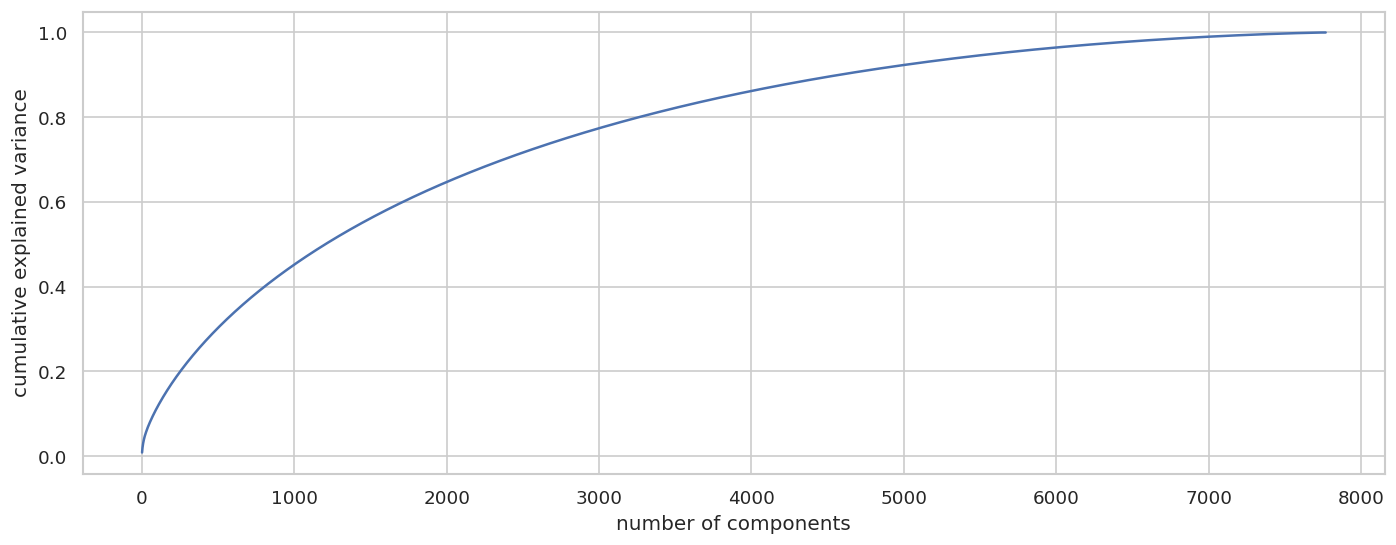

elapsed time :  1005.5939648151398


In [ ]:
start_time = time.time()
pca = PCA()
pca.fit(X.toarray())
end_time = time.time()
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print('elapsed time : ',end_time-start_time)

In [ ]:
start_time_1 = time.time()
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape
end_time_1 = time.time()
print('elapsed time : ',end_time_1-start_time_1)

elapsed time :  996.2532780170441


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - K-Means Clustering

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

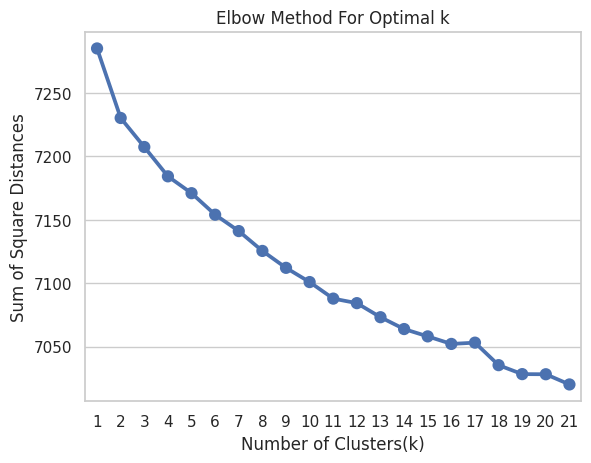

elapsed time :  1272.3368935585022


In [ ]:
start_time_2 = time.time()
sum_of_sq_dist = {}
for k in range(1,22):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 300, n_init=10, random_state=0)
    km = km.fit(X_transformed)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()
end_time_2 = time.time()
print('elapsed time : ',end_time_2-start_time_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


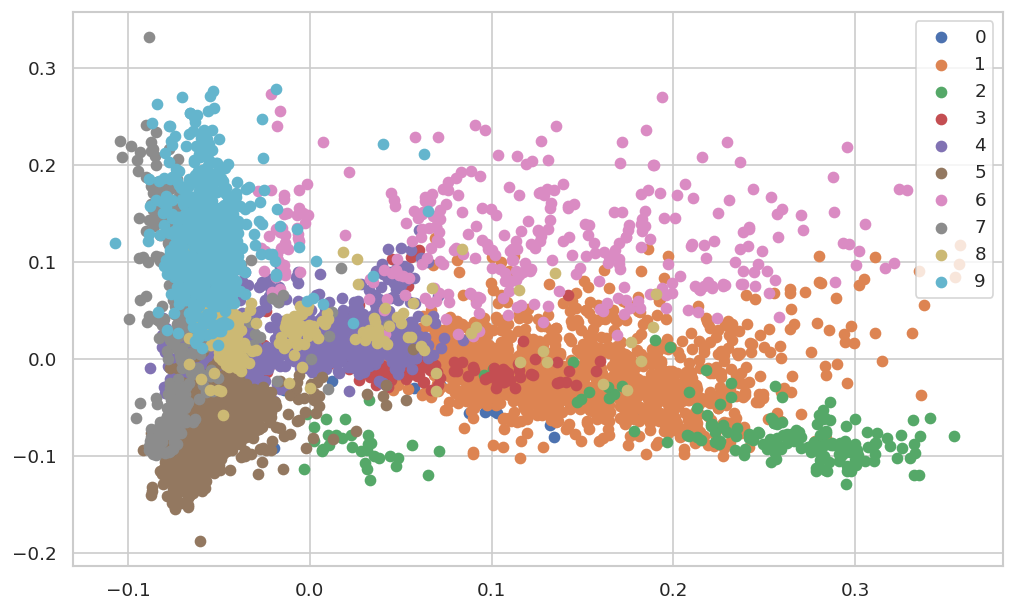

elapsed time :  110.87842202186584


In [ ]:
start_time_3 = time.time()
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predicting the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()
end_time_3 = time.time()
print('elapsed time : ',end_time_3-start_time_3)

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [ ]:
all_features.head(5)

release_year  type_Movie  type_TV Show  rating_G  rating_NC-17  rating_NR  \
0          2020           0             1         0             0          0   
1          2016           1             0         0             0          0   
2          2011           1             0         0             0          0   
3          2009           1             0         0             0          0   
4          2008           1             0         0             0          0   

   rating_PG  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  rating_TV-MA  \
0          0             0         0             0            0             1   
1          0             0         0             0            0             1   
2          0             0         1             0            0             0   
3          0             1         0             0            0             0   
4          0             1         0             0            0             0   

   rating_TV-PG  rating_TV-Y  rating_TV-Y7  rating_TV-Y7-FV  rating_UR  title  
0             0            0             0                0          0     3%  
1             0            0             0                0          0   7:19  
2             0            0             0                0          0  23:59  
3             0            0             0                0          0      9  
4             0            0             0                0          0     21

In [ ]:
for i in ['9', '21']:
    specific_rows = df[df['title'] == i]
    if not specific_rows.empty:
        print(specific_rows['combined_stemmed'].values[0])

postapocalypt world ragdol robot hide fear danger machin extermin brave newcom join group action adventur independ movi scifi fantasi unit state elijah wood john c reilli jennif connelli christoph plummer crispin glover martin landau fred tatascior alan oppenheim tom kane shane acker
brilliant group student becom cardcount expert intent swindl million las vega casino play blackjack drama unit state jim sturgess kevin spacey kate bosworth aaron yoo liza lapira jacob pitt laurenc fishburn jack mcgee josh gad sam golzari helen carey jack gilpin robert luket


In [ ]:
all_features.columns

Index(['release_year', 'type_Movie', 'type_TV Show', 'rating_G',
       'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'title'],
      dtype='object')

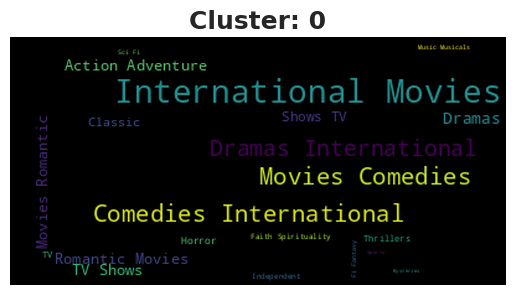

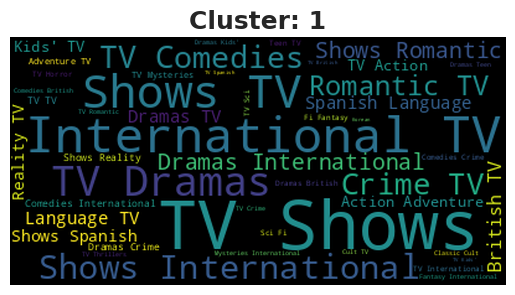

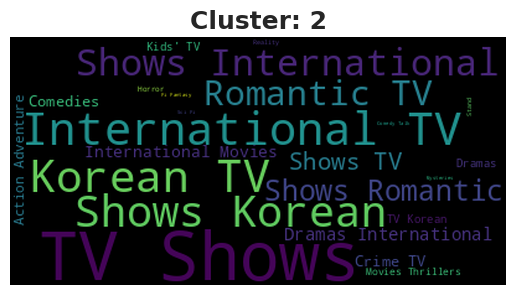

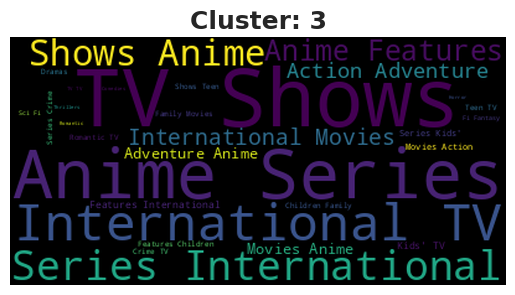

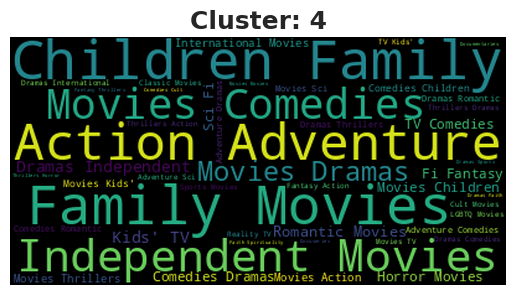

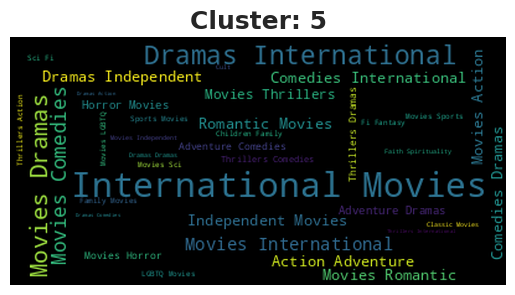

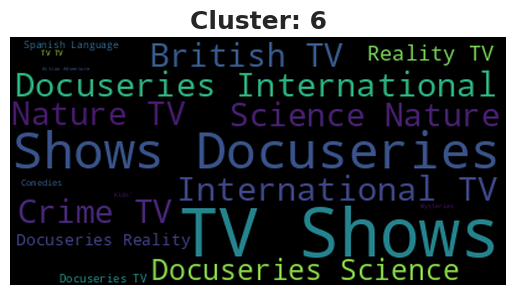

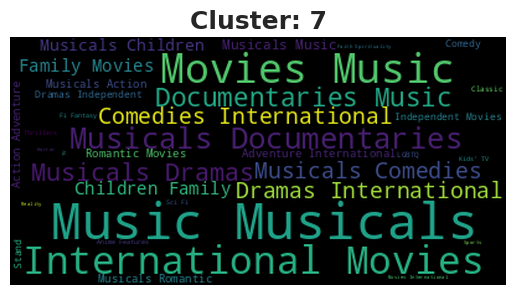

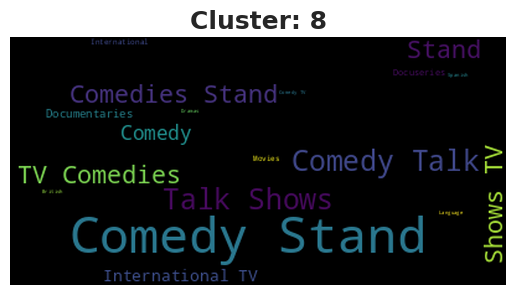

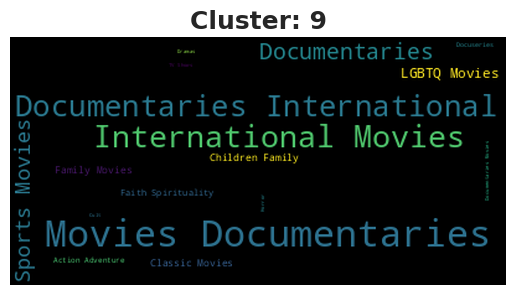

In [ ]:
#word cloud for user rating review
def func_select_Category(cluster_label,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna() #dropping null values
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==cluster_label] #dividing into different clusters
  text = " ".join(word for word in df_word_cloud[column_of_choice]) #rejoining words
  # Create stopword list:
  stopwords = set(STOPWORDS) #to remove stopwords if any
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='blackman')  #imshow function displays the image on the current axes.
  plt.title(f'Cluster: {i}', fontsize=18, fontweight='bold')
  plt.axis("off")
  plt.show()

for i in range(10):
  func_select_Category(i,'listed_in')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

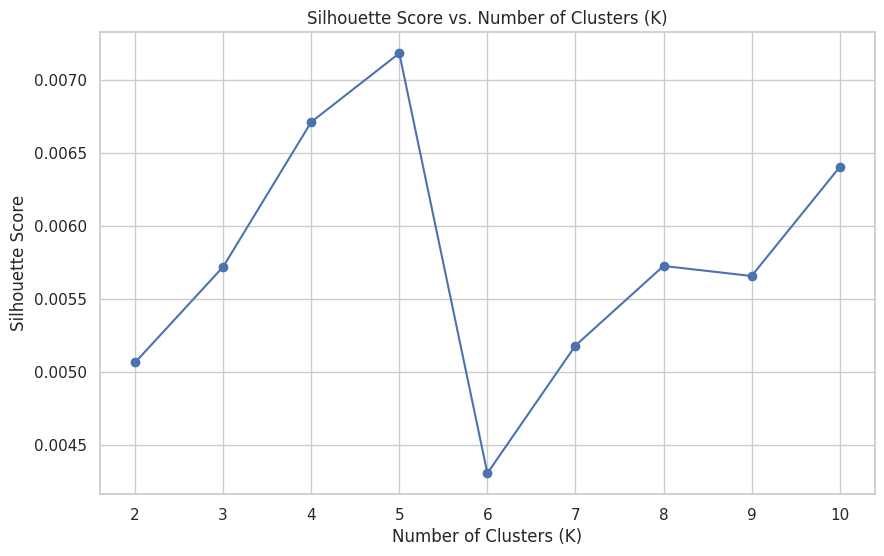

In [ ]:
# Range of K values to test
k_values = range(2, 11)  # You can adjust this range as needed

# Initialize lists to store the Silhouette Scores
silhouette_scores = []

# Calculate the Silhouette Score for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.grid(True)
plt.show()

In [ ]:
type(silhouette_scores)

list

In [ ]:
for i, score in enumerate(silhouette_scores):
    print(f"Clusters {i+2}: {score}")

Clusters 2: 0.0050644261038065895
Clusters 3: 0.005719999472253018
Clusters 4: 0.006711730517474396
Clusters 5: 0.007182694550881043
Clusters 6: 0.004305581898499487
Clusters 7: 0.005180109008454534
Clusters 8: 0.005725671687084807
Clusters 9: 0.005656689841052464
Clusters 10: 0.006402431831282664


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 - Agglomerative Clustering

In [ ]:
k_range = range(5, 12)  #specifying the range for k values

# Compute Silhouette score for each k
from sklearn.cluster import AgglomerativeClustering
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k) #creating an object of agglomerative clustering and setting number of clusters to k
    labels = model.fit_predict(X_transformed) #apply agglomerative clustering model to our X_transformed
    score = silhouette_score(X, labels) #cal silhouette score using sihouette_score function
    print("k=%d, Silhouette score=%f" % (k, score))

k=5, Silhouette score=0.000708
k=6, Silhouette score=0.001415
k=7, Silhouette score=0.001791
k=8, Silhouette score=0.002305
k=9, Silhouette score=0.002059
k=10, Silhouette score=0.002457
k=11, Silhouette score=0.002275


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


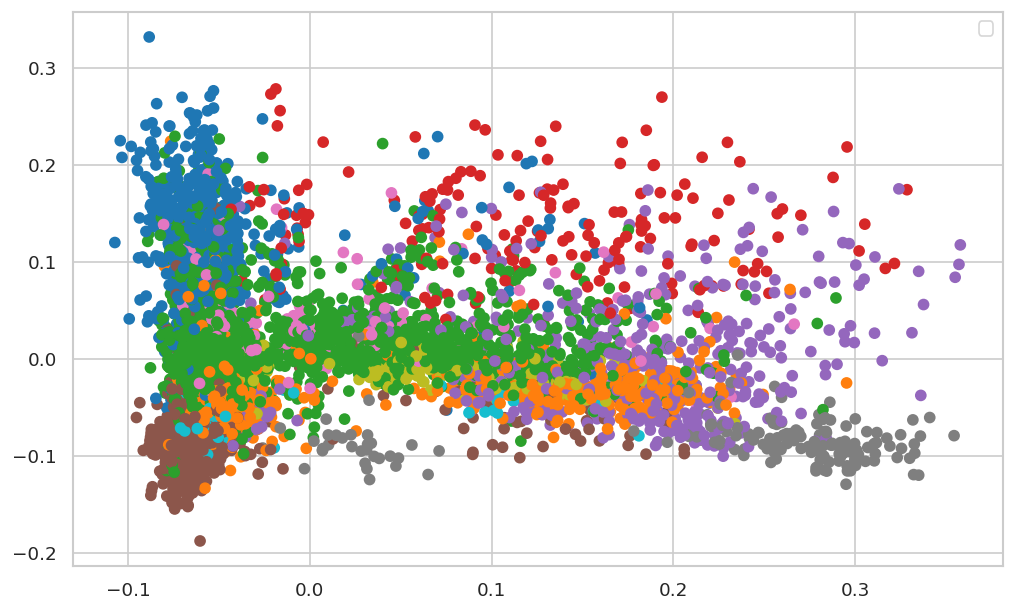

In [ ]:

model = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
labels = model.fit_predict(X_transformed)
# Create a scatter plot with different colors for different clusters
plt.figure(figsize=(10,6), dpi=120)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='tab10')

'''The first argument to the function, X_transformed[:, 0], specifies the
x-coordinates of the data points, while X_transformed[:, 1] specifies the y-coordinates.'''

plt.legend()
plt.show()

In [ ]:
df['cluster_number_agg_clustering'] = model.labels_

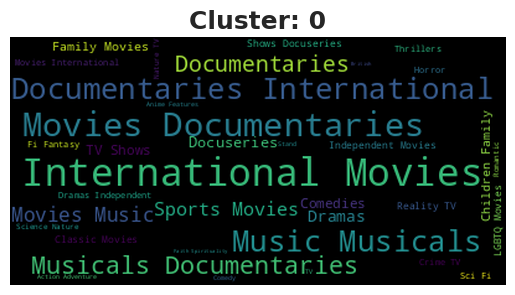

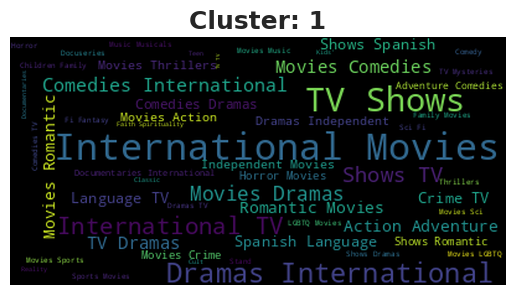

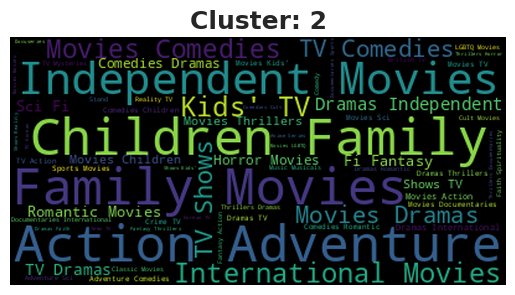

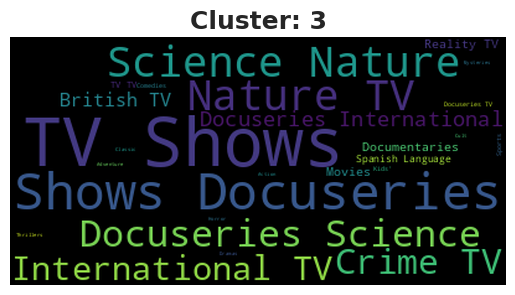

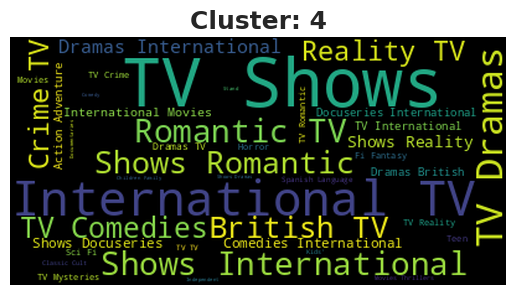

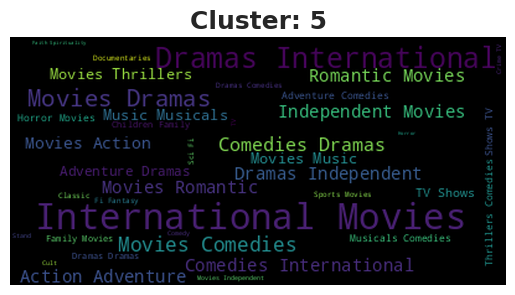

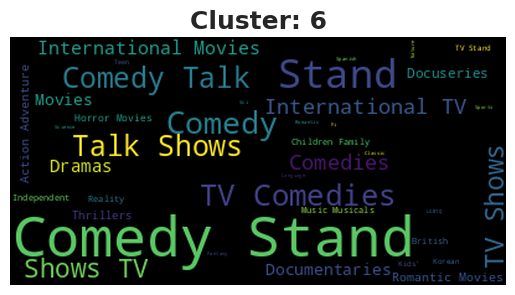

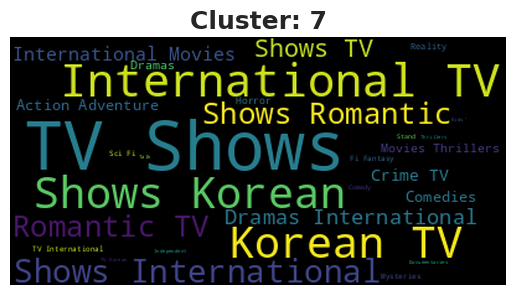

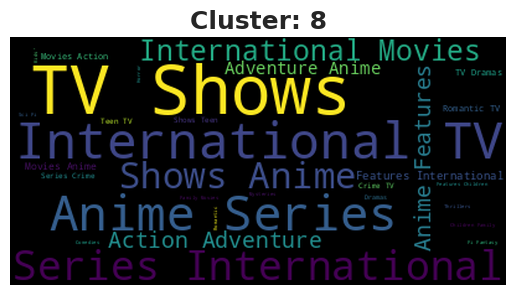

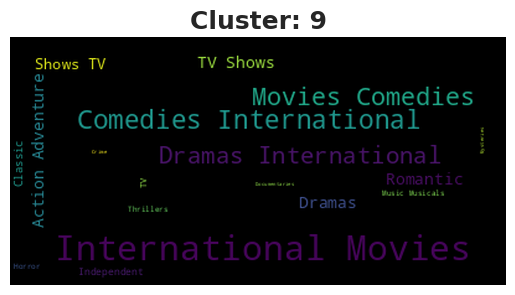

In [ ]:
#word cloud for user rating review
def func_select_Category_agg_clustering(cluster_label,column_of_choice):
  df_word_cloud = df[['cluster_number_agg_clustering',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number_agg_clustering']==cluster_label]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='blackman')
  plt.title(f'Cluster: {i}', fontsize=18, fontweight='bold')
  plt.axis("off")
  plt.show()

for i in range(10):
  func_select_Category_agg_clustering(i,'listed_in')

##Here we have used the same code we used above for plotting, we have just replaced some names

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance with a fixed min_samples value
min_samples = 5
dbscan = DBSCAN(min_samples=min_samples)

# Vary the eps parameter to find the desired number of clusters (e.g., around 10)
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6]  # Adjust the range as needed

for eps in eps_values:
    dbscan.set_params(eps=eps)
    cluster_labels = dbscan.fit_predict(X)  # X represents your data
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    print(f"eps={eps}, Number of clusters={n_clusters}")


eps=0.2, Number of clusters=0
eps=0.3, Number of clusters=0
eps=0.4, Number of clusters=0
eps=0.5, Number of clusters=0
eps=0.6, Number of clusters=0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***